# Week 05 - Probabilities and Distributions II

Data Science Process:<br />
https://towardsdatascience.com/the-data-science-process-a19eb7ebc41b

Getting Data:<br />
https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/datasets/faithful.csv<br />
View raw and save as

### Extra Reading

https://www.cs.princeton.edu/courses/archive/spring07/cos424/scribe_notes/0208.pdf<br />
https://saylordotorg.github.io/text_introductory-statistics/index.html<br />
https://www.itl.nist.gov/div898/handbook/eda/section3/eda33.htm<br />
https://www.itl.nist.gov/div898/handbook/<br />

### IID: Independent and Identically Distributed

According to Wikipedia (2022):

> In probability theory and statistics, a collection of random variables is independent and identically distributed if each random variable has the same probability distribution as the others and all are mutually independent. This property is usually abbreviated as i.i.d. or iid or IID. IID was first used in statistics. With the development of science, IID has been applied in different fields such as data mining and signal processing (para. 1).

Independent and identically distributed random variables. (February 13, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables

https://stackoverflow.com/questions/24204582/generate-multiple-independent-random-streams-in-python

https://www.statisticshowto.com/iid-statistics/

### Random Variables

According to Wikipedia (2022):

> A random variable is a mathematical formalization of a quantity or object which depends on random events. Informally, randomness typically represents some fundamental element of chance, such as in the roll of a dice; it may also represent uncertainty, such as measurement error (para 1).

Random variable. (February 6, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Random_variable

### Discrete Random Variables 

Countable possible outcomes

Rolling dice (2):<br />
https://www.thoughtco.com/probabilities-of-rolling-two-dice-3126559

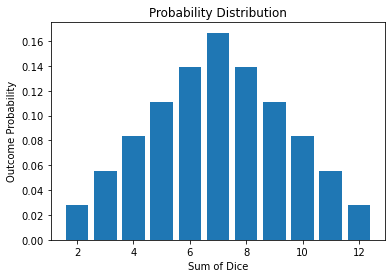

In [1]:
# plot probability distribution
import matplotlib.pyplot as plt

sums = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
probs = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]

plt.bar(sums, probs)
plt.xlabel('Sum of Dice')
plt.ylabel('Outcome Probability')
plt.title('Probability Distribution')
plt.show();

### Continuous Random Variables 

https://en.wikipedia.org/wiki/Random_variable

A continuous random variable X takes all values in a given interval
* Often plotted as a curve, or density curve
* P(some number) = 0

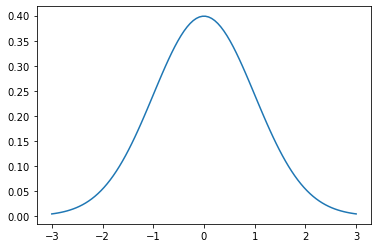

In [2]:
# plot normal curve
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

x = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1))
plt.show()

### Distributions

Discrete distributions: all probabilities add up to one
* Binomial
* Poisson

Continuous distributions: area under curve adds up to one
* Normal
* z
* t

### Types of Distributions

https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html

* Normal and z
* Uniform
* Binomial
* Bernoulli
* Multinomial
* Poisson
* t
* F
* Chi-Square

### Parameters of a Population and Sample

Parameters are numbers that summarize data for an entire population. A statistics is a number that summarizes data from a sample. Each are notated differently. For example the mean of a population is represented by $\mu$ and the mean of a statistic is represented by $\bar{x}$. The formulas look like the following: <br />
population mean: $\mu = \frac{\sum{x_i}}{N}$<br />
sample mean: $\bar{x} = \frac{\sum{x_i}}{n}$<br />

### Parameters of a Parametric Equation

Parameters are also used in parametric equations. Any equation expressed in terms of parameters is a parametric equation. For example, y = mx + b (slope/intercept form for the equation of a line), is a parametric equation where m and b are considered the parameters because they remain constant for a given line. The variables x and y change, vary, according to the change in x. Y is dependent on the independent x. In fact, we often refer to y as a function of x, notated like $f(x)$. We'll look at more of this in the Linear Regression section.

In this course, most of our datasets contains the x values as rows of records or observations so we're not to concerned about finding x, or big X for multivariate datasets. We are concerned with finding the parameters, or the best estimate for our parameters given X. For y = mx + b we want to find the parameters, m & b. 

For the normal distribution probability density function <br />
$
\frac{1}{\sqrt{2\pi\sigma^2}}\large{e^\frac{-(x-\mu)^2}{2\sigma^2}}
$ <br />
we want to find $\mu$ and $\sigma$. Parameters are often represented together using notation similar to $\theta = \{\mu, \sigma\}$.

### Probability Density Function

According to NIH SEMATECH (2022):

> For a continuous function, the probability density function (pdf) is the probability that the variate has the value x. Since for continuous distributions the probability at a single point is zero, this is often expressed in terms of an integral between two points.

Related Distributions. (February 13, 2022). In *NIST/SEMATECH e-Handbook of Statistical Methods*. https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm

mu = -0.06, sigma = 1.01


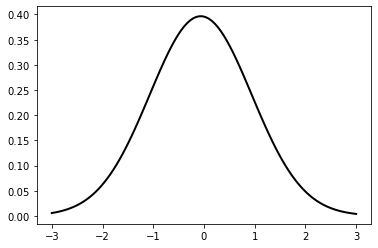

In [3]:
# demonstrate pdf
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats

# pay attention to the use of the parameters inside the stats.norm.pdf function.
data = stats.norm.rvs(size=1000) # rvs = random variates

# get the parameter for a normal distribution
parameters = stats.norm.fit(data) 
mu = parameters[0]
sigma = parameters[1] # sigma is std

# using unpacking
mu, sigma = parameters

print(f'mu = {mu:.2f}, sigma = {sigma:.2f}') # f strings https://zetcode.com/python/fstring/

# plot the PDF.
xmin, xmax = plt.xlim() # https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.xlim.html
x = np.linspace(-3, 3, 100)
params = stats.norm.pdf(x, loc=mu, scale=sigma)
# we could also do stats.norm.pdf(x, loc=0, scale=1)

plt.plot(x, params, 'k', linewidth=2); # k is short for the color black

### Cumulative Density Function

According to NIH SEMATECH (2022):

> The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x

Related Distributions. (February 13, 2022). In *NIST/SEMATECH e-Handbook of Statistical Methods*. https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm

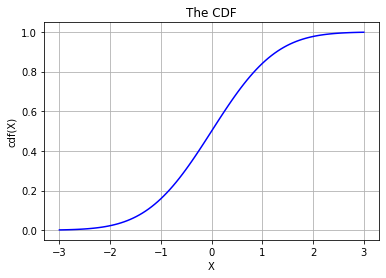

In [4]:
# plot the cdf
x = np.linspace(-3, 3, 100)
cdf_y = stats.norm.cdf(x)
plt.plot(x, cdf_y, 'b', label='cdf')
plt.title('The CDF')
plt.xlabel('X') 
plt.ylabel('cdf(X)') 
plt.grid(True)
plt.show();

### Percent Point Function

According to NIH SEMATECH (2022):

> The percent point function (ppf) is the inverse of the cumulative distribution function. For this reason, the percent point function is also commonly referred to as the inverse distribution function. That is, for a distribution function we calculate the probability that the variable is less than or equal to x for a given x. For the percent point function, we start with the probability and compute the corresponding x for the cumulative distribution.

Related Distributions. (February 13, 2022). In *NIST/SEMATECH e-Handbook of Statistical Methods*. https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm

The cdf percentile associated with 1 standard deviation above the mean is 0.84% so,
a z score for 0.84  is 0.9885483565557652 and,
a z score for 50% is 0.02
for normal distributions.


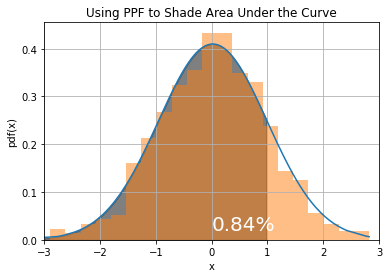

In [5]:
# compare CDF and PPF
X = stats.norm.rvs(size=1000)
X.sort()

parameters = stats.norm.fit(X) 
mu, sigma = parameters
cdf_val = np.round(stats.norm.cdf(1, loc=mu, scale=sigma), 2)
ppf_val = np.round(stats.norm.ppf(cdf_val, loc=mu, scale=sigma), 2)

print(f'The corresponding percentile for 1 standard deviation above the mean (z) is {cdf_val}% so,')
print(f'a z score for {cdf_val}  is {stats.norm.ppf(cdf_val, loc=mu, scale=sigma)} and,')
print(f'a z score for 50% is {np.round(stats.norm.ppf(0.5, loc=mu, scale=sigma), 2)}')
print('for normal distributions.')

fig, ax = plt.subplots()
ax.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
ax.hist(X, bins=25, density=True, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_xlim(-3, 3)
ax.grid(True)

px=np.arange(-3, ppf_val, 0.01)
ax.fill_between(px, stats.norm.pdf(px,loc=mu,scale=sigma), alpha=0.5, color='k')
ax.text(0, 0.02, f'{cdf_val}%', fontsize=20, color='w')

plt.title('Using PPF to Shade Area Under the Curve')
plt.show()

### CDF Example


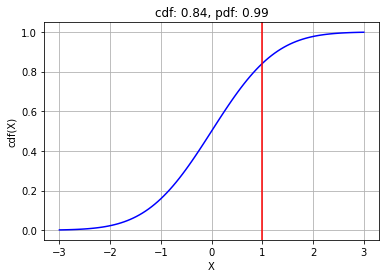

In [6]:
# plot the cdf with ppf
mu = 0
sigma = 1
cdf_val = np.round(stats.norm.cdf(1, loc=mu, scale=sigma), 2)
ppf_val = np.round(stats.norm.ppf(cdf_val, loc=mu, scale=sigma), 2)

x = np.linspace(-3, 3, 100)
cdf_y = stats.norm.cdf(x)
plt.plot(x, cdf_y, 'b', label='cdf')
plt.axvline(x=ppf_val, color='red', label='Mean')
plt.title(f'cdf: {cdf_val}, pdf: {ppf_val}')
plt.xlabel('X') 
plt.ylabel('cdf(X)') 
plt.grid(True)
plt.show();

### Probability Mass Function

According to NIH SEMATECH (2022):

> Discrete probability functions are referred to as probability mass functions and continuous probability functions are referred to as probability density functions. The term probability functions covers both discrete and continuous distributions (para. 5).

What is Probability Distribution. (February 13, 2022). In *NIST/SEMATECH e-Handbook of Statistical Methods*. https://www.itl.nist.gov/div898/handbook/eda/section3/eda361.htm

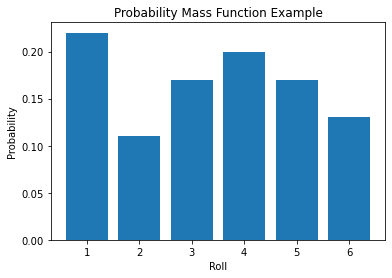

In [7]:
# probability mass function
throws = 100
observations = []
for i in range(throws):    
    roll = np.random.choice(['1', '2', '3', '4', '5', '6']) # roll the die
    observations.append(roll)

val, cnt = np.unique(observations, return_counts=True)
prop = cnt / len(observations)

plt.bar(val, prop)
plt.ylabel('Probability')
plt.xlabel('Roll')
plt.title('Probability Mass Function Example')
plt.show()

### Kernel Density Estimation

According to Wikipedia (2022):

> In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

Kernel density estimation. (February 13, 2022) In *Wikipedia*. https://en.wikipedia.org/wiki/Kernel_density_estimation 

As mentioned, KDE is a non-parametric estimate compared to the parametric probability density function. Non-parametric data do not fit an established distribution such as the normal, or gaussian, distribution. Non-parametric models don't have parameters to define the data distribution so in the case of KDE, the shape of the data is estimated. 

According to Wikipedia (2022):

> In nonparametric statistics, a kernel is a weighting function used in non-parametric estimation techniques. Kernels are used in kernel density estimation to estimate random variables' density functions, or in kernel regression to estimate the conditional expectation of a random variable.

Nonparametric statistics. (February 13, 2022) In *Wikipedia*.https://en.wikipedia.org/wiki/Kernel_(statistics)#Nonparametric_statistics

Here is a simplified version of the equation provided by Wikipedia:

$
\hat{f(x)} = \frac{1}{N}\sum{K(x - x_i)}
$ 

Let (x1, x2, …, xn) be independent and identically distributed \[IID\] samples drawn from some univariate distribution with an unknown density ƒ at any given point x. We are interested in estimating the shape of this function ƒ.

https://en.wikipedia.org/wiki/Kernel_density_estimation#Definition

Recall **IID** definition: In probability theory and statistics, a collection of random variables is independent and identically distributed if each random variable has the same probability distribution as the others and all are mutually independent.

https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables

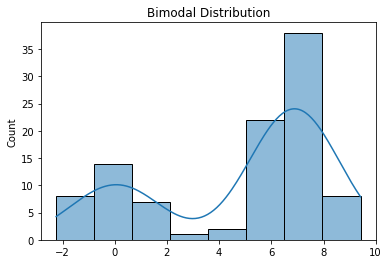

In [8]:
import seaborn as sns
from scipy.stats.distributions import norm

x = np.random.randn(100)
x[int(0.3 * 100):] += 7
sns.histplot(x, kde=True)
plt.title('Bimodal Distribution')
plt.show()

## The Normal (Gaussian) Distribution

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm

### Normal Distribution Equation

Compare the formula for the normal distribution as shown below

$
\frac{1}{\sqrt{2\pi\sigma^2}}\large{e^\frac{-(x-\mu)^2}{2\sigma^2}}
$

with the python code below

1/(np.sqrt(2 * np.pi * sigma&ast;&ast;2)) * np.exp( - (x - mu)&ast;&ast;2 / (2 * sigma&ast;&ast;2))

Let's break the code down:
* x = our set of numbers 
* mu = mean
* sigma&ast;&ast;2 (sigma squared) = variance of x (sigma = std)
* exp = exponential
* 1 is our numerator
* np.sqrt(2 * np.pi * sigma&ast;&ast;2) = $\sqrt{2\pi\sigma^2}$ NOTE: the two asterisk designate a power such as squared
* np.exp( - (x - mu)&ast;&ast;2 / (2 * sigma&ast;&ast;2)) = $\large{e^\frac{-(x-\mu)^2}{2\sigma^2}}$

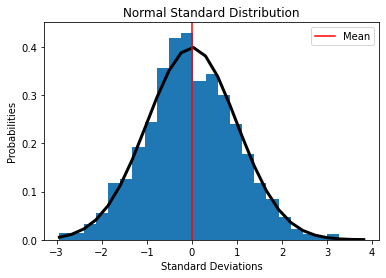

In [9]:
# standard normal distribution with numpy
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
mu = 0
sigma = 1
x = np.random.normal(0, 1, 1000) 
count, bins, ignored = plt.hist(x, density=True, bins=25)

# plot the distribution curve
plt.plot(bins, 1/(np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='k')
plt.xlabel('Standard Deviations')
plt.ylabel('Probabilities')
plt.axvline(x=mu, color='red', label='Mean')
plt.title('Normal Standard Distribution')
plt.legend()
plt.show()

In [10]:
# standard normal distribution with stats
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html
import scipy.stats as stats 

data = stats.norm.rvs(size=1000)
stats.describe(data)

DescribeResult(nobs=1000, minmax=(-3.2457026729729623, 2.9146794303967383), mean=-0.005468655984226629, variance=0.973975325662127, skewness=0.05388373776654965, kurtosis=-0.11944381770826373)

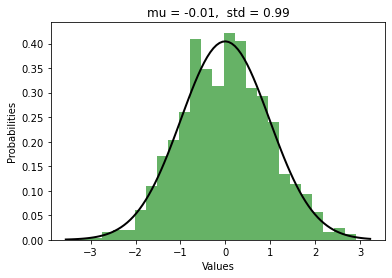

In [11]:
# fit a normal distribution to the data
import numpy as np
import matplotlib.pyplot as plt 

mu, std = stats.norm.fit(data)

# Plot the histogram
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the pdf
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Values')
plt.ylabel('Probabilities')
plt.title(f'mu = {mu:.2f},  std = {std:.2f}')

plt.show()

In [12]:
# f strings: https://realpython.com/python-f-strings/
import math

print(f'The variance is {data.var()}')
print(f'The standard deviation is {data.std()}')
print(f'The square root of the variance is {math.sqrt(data.var())}')

The variance is 0.9730013503364648
The standard deviation is 0.9864083081242092
The square root of the variance is 0.9864083081242092


In [13]:
# integer data that are normally distributed
# from https://seattlecentral.edu/qelp/sets/057/057.html (housefly wing length)

with open('normdist.txt') as f:
    wings = list(f)
    
wing_data = [int(x.rstrip()) for x in wings] # remove line breaks

In [14]:
# create data and get mean and median

xmean = np.mean(wing_data)
xmedian = np.median(wing_data)
xmode = stats.mode(wing_data)[0][0]

print(f'Mean: {xmean}')
print(f'Median: {xmedian}')
print(f'Mode: {xmode}')
print(f'Variance: {np.var(wing_data)}')
print(f'Standard Deviation: {np.std(wing_data)}')

Mean: 45.5
Median: 45.5
Mode: 45
Variance: 15.21
Standard Deviation: 3.9


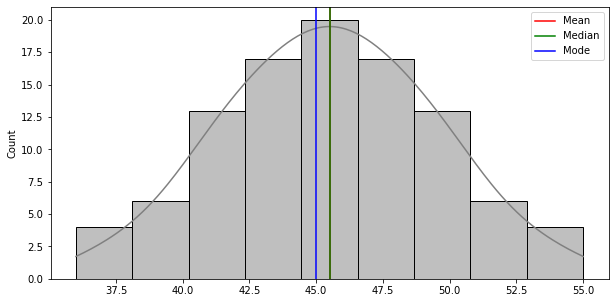

In [15]:
# plotting mean, median, mode
import seaborn as sns

fig = plt.figure(figsize=(10,5))
sns.histplot(wing_data, kde=True, color='grey')
plt.axvline(x=xmean, color='red', label='Mean')
plt.axvline(x=xmedian, color='green', label='Median')
plt.axvline(x=xmode, color='blue', label='Mode')
plt.legend()
plt.show()

<AxesSubplot:>

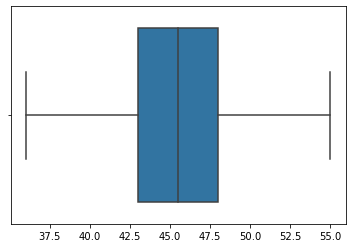

In [16]:
# normal data and the boxplot
sns.boxplot(x=wing_data)

<AxesSubplot:>

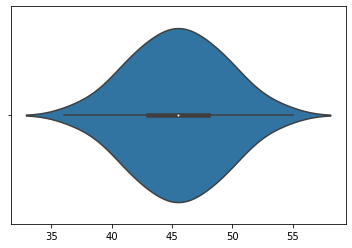

In [17]:
# normal data and the violin plot
sns.violinplot(x=wing_data)

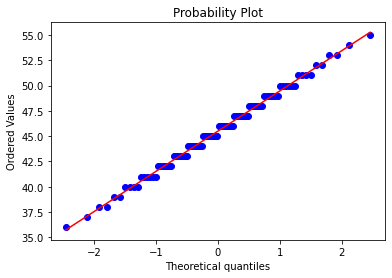

In [18]:
# the normal plot is also good to know
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
# https://www.itl.nist.gov/div898/handbook/eda/section3/normprpl.htm

stats.probplot(wing_data, plot=plt)
plt.show()

In [19]:
# look at a skewed distribution
# data taken from https://gist.github.com/noamross/e5d3e859aa0c794be10b
import pandas as pd

cars = pd.read_csv('cars.csv')
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [20]:
# compare mean and median
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [21]:
# get the mean, median, mode for the hp (horsepower) field
hp_mean = cars['hp'].mean()
hp_median = cars['hp'].median()
hp_mode = cars['hp'].mode()[0]

print(f'Mean: {hp_mean}')
print(f'Median: {hp_median}')
print(f'Mode: {hp_mode}')

Mean: 146.6875
Median: 123.0
Mode: 110


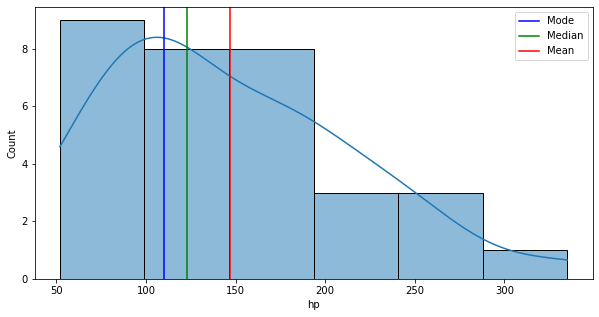

In [22]:
# skewed data and the distplot

fig = plt.figure(figsize=(10,5))
sns.histplot(cars['hp'], kde=True)
plt.axvline(x=hp_mode, color='blue', label='Mode')
plt.axvline(x=hp_median, color='green', label='Median')
plt.axvline(x=hp_mean, color='red', label='Mean')
plt.legend()
plt.show()

<AxesSubplot:xlabel='hp'>

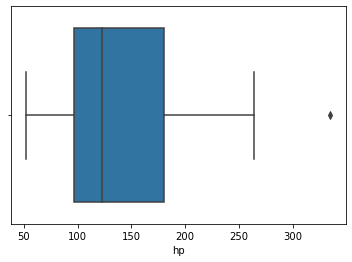

In [23]:
# skewed data and the boxplot
sns.boxplot(x=cars['hp'])

<AxesSubplot:xlabel='hp'>

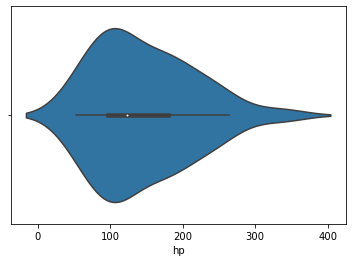

In [24]:
# skewed data and the violin plot
sns.violinplot(x=cars['hp'])

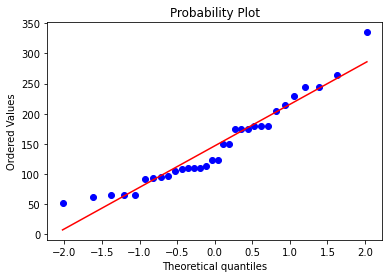

In [25]:
# skewed data and the probplot
stats.probplot(cars['hp'], plot=plt);

### z Distribution

* mu = 0
* sigma = 1
* 68% of the data lies within -1, 1 deviation
* 95.45% of the data lies within -2, 2 deviations
* 99.73% of the data lies within -3, 3 deviations
* Emprical rule 68, 95, 99.7 rule. https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
* z score: $z = \frac{x-\mu}{\sigma}$

In [26]:
# using cdf and
from scipy import stats

z = .7
print(f'z score of {z} = {stats.norm.cdf(z)} percentile')
percentile = .95
print(f'{percentile} percentile = z score of {stats.norm.ppf(percentile)}')

z score of 0.7 = 0.758036347776927 percentile
0.95 percentile = z score of 1.6448536269514722


In [27]:
# clock maker operating costs
import numpy as np

monthly_avg_of_clocks = 100
std_dev = 20

# monthly operating cost f(X) = $10X + $1000
monthly_cost = 10 * 100 + 1000 # expected
print(monthly_cost)
std_dev_operate = np.abs(10) * std_dev
print(std_dev_operate)
# we know that about 95% of the time our operating costs will be between 1600 and 2400 (2 standard deviations)

2000
200


### Uniform Distribution

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3662.htm

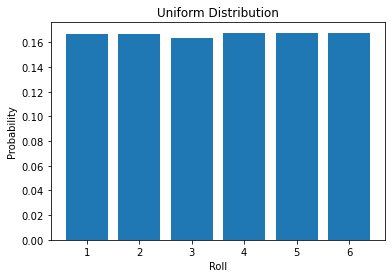

In [28]:
# uniform distribution
throws = int(1e5)
observations = []
for i in range(throws):    
    roll = np.random.choice(['1', '2', '3', '4', '5', '6']) # roll the die
    observations.append(roll)

val, cnt = np.unique(observations, return_counts=True)
prop = cnt / len(observations)

plt.bar(val, prop)
plt.ylabel('Probability')
plt.xlabel('Roll')
plt.title('Uniform Distribution')
plt.show()

### Binomial Distribution

Formula:<br />
$P(x: n,p) = \binom {n}{x} p^x (1 - p)^{(n-x)}$

* n trials
* x successes

According to StatisticsHowTo (2022):

> A binomial distribution can be thought of as simply the probability of a SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has two possible outcomes (the prefix “bi” means two, or twice). For example, a coin toss has only two possible outcomes: heads or tails and taking a test could have two possible outcomes: pass or fail.

Binomial Distribution: Formula, What it is, How to use it. (February 13, 2022). In *StatisticsHowTo*. https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/

More info:
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
* https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
* https://stattrek.com/online-calculator/binomial.aspx

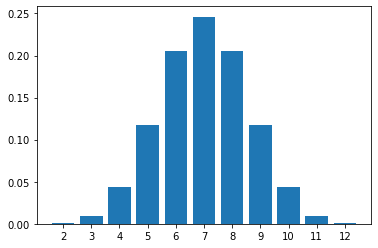

In [29]:
# binomial distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
# binom.pmf(k, n, p, loc)

n = 10
p = 0.5
trials = list(range(n + 1))
dist = [binom.pmf(x, n, p) for x in trials]

fig, ax = plt.subplots()
ax.bar(trials, dist)
ax.set_xticks(np.arange(0, 11))
ax.set_xticklabels(np.arange(2, 13));

### Bernoulli Distribution

Success vs Failure
* P(Success) is constant 1/2, 1/6
* Trials are independent

https://en.wikipedia.org/wiki/Bernoulli_distribution

https://vitalflux.com/bernoulli-probability-distribution-explained-with-python-examples/

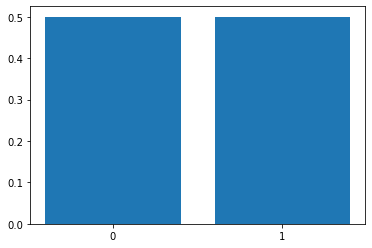

In [30]:
# import matplotlib.pyplot as plt
from scipy.stats import bernoulli

bdist = bernoulli(0.5)
X = [0, 1]

fig, ax = plt.subplots()
ax.bar(X, bdist.pmf(X))
ax.set_xticks(np.arange(0, 2))
plt.show()

### Multinomial Distribution

* https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html
* https://www.statology.org/multinomial-distribution/
* https://www.statology.org/multinomial-distribution-in-python/
* https://www.euanrussano.com/post/probability/multinoulli_multinomial/

In [31]:
# https://www.statology.org/multinomial-distribution-in-python/
from scipy.stats import multinomial

multinomial.pmf(x=[2, 4, 4], n=10, p=[.1, .4, .5])
# probability of 2, 4, 4 happening given probabilities

0.05040000000000001

In [32]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html
import numpy as np

np.random.multinomial(n=20, pvals=[1/6.]*6, size=1)
# rolling a die 20 times; one appears x times, two appears x times, three appears x times, etc

array([[2, 2, 2, 7, 2, 5]])

In [33]:
np.random.multinomial(20, [1/6.]*6, size=2)
# rolling 20 times and then 20 times again

array([[3, 5, 2, 5, 4, 1],
       [4, 3, 5, 3, 1, 4]])

### Poisson Distribution

$P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$

* lambda = mu = expected value
* P(Success) is proportional through the entire interval (lambda(minute) = lambda(hour)/60)

A Poisson distribution is a tool that helps to predict the probability of certain events happening when you know how often the event has occurred. It gives us the probability of a given number of events happening in a fixed interval...

Stephanie Glen. "Poisson Distribution / Poisson Curve: Simple Definition" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/probability-distribution/poisson-distribution/

More info:
* https://stattrek.com/probability-distributions/poisson.aspx
* https://hadrienj.github.io/posts/Essential-Math-poisson_distribution/
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
* https://www.analyticsvidhya.com/blog/2022/06/predicting-the-scoreline-of-a-football-match-using-poisson-distribution/

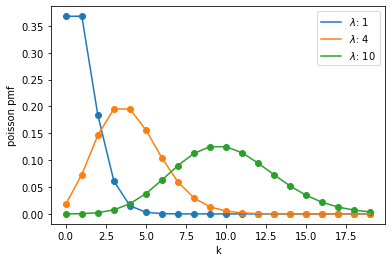

In [34]:
# plot some poisson distributions
from scipy.stats import poisson

k = np.arange(0, 20)

for lambd in [1, 4, 10]:
    distribution = []
    for i in k:
        distribution.append(poisson.pmf(i, lambd))

    plt.plot(k, distribution, label=f'$\lambda$: {lambd}')
    plt.scatter(k, distribution)
    
plt.xlabel('k')
plt.ylabel('poisson pmf')
plt.legend();

In [35]:
from scipy.stats import poisson

poisson.pmf(k=5, mu=4) # mu = lambda = expected value
# what's the probability that 5 things will happen given an average of 4 things happening in a period of time

0.1562934518505317

### t Distribution

https://www.statisticshowto.com/probability-and-statistics/t-distribution/

The z-distribution assumes we know the population standard deviation while the t-distribution uses the sample standard deviation. The following is a review of the equations for both means and standard deviations: <br />

**The Population Mean** <br />
$\mu = \frac{\sum{x_i}}{N}$<br />
**The Sample Mean** <br />
$\bar{x} = \frac{\sum{x_i}}{n}$<br />
**The Population Standard Deviation** <br />
$
\sigma = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}
$ <br />
**The Sample Standard Deviation** <br />
$
s = \sqrt{\frac{1}{n-1}\sum(x-\bar{x})^2}
$ 

Notice we're using Bessel's correction again. We can also call this a degree of freedom. 

### See the Bessel's Correction notebook

In [36]:
# compare population and sample
data = stats.norm.rvs(size=1000) 
print(f'Population mean: {np.round(np.mean(data), 4)}')
print(f'Sample mean: {np.round(np.mean(data), 4)}')
print(f'Population standard deviation: {np.round(np.std(data, ddof=0), 4)}')
print(f'Sample standard deviation: {np.round(np.std(data, ddof=1), 4)}')

Population mean: -0.0544
Sample mean: -0.0544
Population standard deviation: 1.013
Sample standard deviation: 1.0135


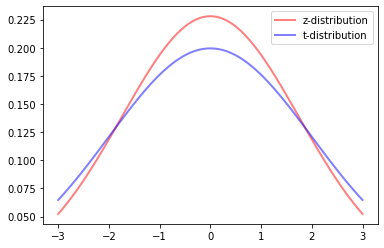

In [37]:
# compare the z and t distribution be exaggerating the standard deviation of the t distribution
X = np.linspace(-3, 3, 100)
parameters = stats.norm.fit(X) 
mu, sigma = parameters

# the z distribution
zs = stats.norm.pdf(X, loc=mu, scale=sigma)
plt.plot(X, zs, 'r', linewidth=2, alpha=0.5, label='z-distribution') 

# the t distribution
ts = stats.norm.pdf(X, loc=mu, scale=2)
plt.plot(X, ts, 'b', linewidth=2, alpha=0.5, label='t-distribution') 

plt.legend()
plt.show()